In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] =  (20,10)
pd.options.display.max_rows = 4000

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data cleaning

In [7]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# since the num of null values is max 73 which is very less we can 
#drop all the null rows
df.dropna(inplace=True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df.shape

(13246, 5)

In [10]:
# check the size col and make all the values as similar type
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df['bhk'].value_counts(sort=True, ascending= True)
#seems like there are aaprtments even with 43 rooms.. this looks fishy, lets explore 

19       1
16       1
13       1
12       1
18       1
43       1
14       1
27       1
11       4
10      14
9       54
8       89
7      100
6      221
5      353
1      649
4     1395
3     4832
2     5527
Name: bhk, dtype: int64

In [13]:
df[df['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# We convert the 
def is_float(val):
    try:
        float(val)
    except:
        return False
    return True

In [16]:
# some values are in ranges, so we need to keep uniform values
# show the values whcih are not float
df[~df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def convert_to_sqft(x):
    if '-' in x:
        parts = x.split('-')
        return (float(parts[0])+float(parts[1]))/2
    elif 'Sq. Meter' in x:
        parts = x.split('Sq. Met')
        return float(parts[0]) * 10.7639
    elif 'Perch' in x:
        parts = x.split('P')
        return float(parts[0]) * 272.25
    elif 'Sq. Yards' in x:
        parts = x.split('Sq. Yar')
        return float(parts[0]) * 9
    elif 'Acres' in x:
        parts = x.split('Ac')
        return float(parts[0]) * 43560
    elif 'Guntha' in x:
        parts = x.split('Gun')
        return float(parts[0]) * 1089
    elif 'Cents' in x:
        parts = x.split('Cen')
        return float(parts[0]) * 435.56
    elif 'Grounds' in x:
        parts = x.split('Gro')
        return float(parts[0]) * 2400
    else:
        return float(x)

In [18]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
df.loc[3228]

location      Dodda Banaswadi
size                5 Bedroom
total_sqft            32722.3
bath                        5
price                     140
bhk                         5
Name: 3228, dtype: object

## Feature Engg

In [20]:
## calculating price/sqft since it is an important feature
df1 = df.copy()
df1['price_per_sqft'] = df['price']*100000/df['total_sqft']
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
## Handling Categorical variable-- "location" with one hot encoding.
## We check no of unique locations. There are to many locations.so after one hot encoding there will be 1304 cols which is huge
# this is called **dimesionality curse**
len(df1['location'].unique())

1304

In [22]:
df1.location = df1.location.apply(lambda x: x.strip())
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

#### Dimensionality Reduction

In [23]:
# we check the no of locations below a certain threshold (i.e <=10 data points)
len(location_stats[location_stats<=10])

1052

In [24]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10
## all these locations <=10 datapoints can be grouped into "Other locations" 

location
BTM 1st Stage                                         10
Basapura                                              10
Sector 1 HSR Layout                                   10
Naganathapura                                         10
Kalkere                                               10
Nagadevanahalli                                       10
Nagappa Reddy Layout                                  10
Sadashiva Nagar                                       10
Gunjur Palya                                          10
Dairy Circle                                          10
Ganga Nagar                                           10
Dodsworth Layout                                      10
1st Block Koramangala                                 10
Chandra Layout                                         9
Jakkur Plantation                                      9
2nd Phase JP Nagar                                     9
Yemlur                                                 9
Mathikere             

In [25]:
len(df1['location'].unique())

1293

In [26]:
df1['location'] = df1['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df1['location'].unique())

242

### Outlier Removal using business logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [27]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
# now we check the outliers in area in sqft per room
# we can take a median value for area per room in sqft = 300 say(i.e a 600sqft apartment will have 2 rooms)

#now we check the apartments that have area per room < 300
df1[df1.total_sqft/df1.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [29]:
df1.shape

(13246, 7)

In [30]:
# now we remove those apartments
df2 = df1[~(df1.total_sqft/df1.bhk < 300)]
df2.shape
# so now we have less items after outlier removal

(12498, 7)

### Outlier removal using mean and standard deviation

Here we find that min price per sqft is 2.25 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [31]:
# now we check the price per sqft and remove outlier
df2.price_per_sqft.describe()
## here we find that the min price per sqft is 2.25 and the max is 176470. These are extreme cases

count     12498.000000
mean       6298.898075
std        4169.130144
min           2.257423
25%        4203.458878
50%        5291.005291
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
# function to remove extreme cases beyond 1 STD from mean(beyond 68% data)
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape
    

(10268, 7)

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

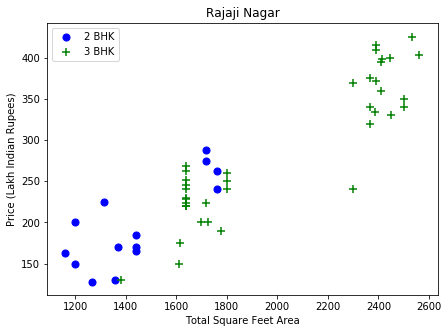

In [33]:
def plot_scatter(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (7,5)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter(df3,'Rajaji Nagar')

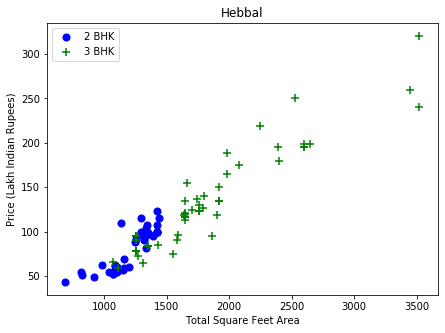

In [34]:
plot_scatter(df3,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

#### Now we remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [35]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
df4.shape

(7344, 7)

#### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

## <font color='green'>Before and After outlier removal for "Rajaji Nagar"</font> 

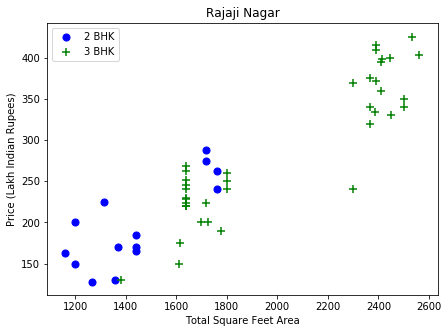

In [36]:
plot_scatter(df3,"Rajaji Nagar")

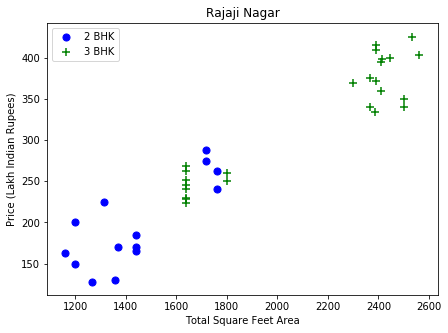

In [37]:
plot_scatter(df4,"Rajaji Nagar")

## <font color='green'>Before and After outlier removal for "Hebbal"</font> 

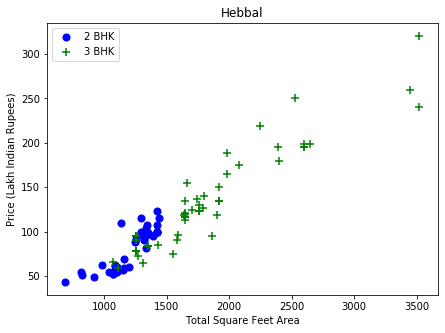

In [38]:
plot_scatter(df3,"Hebbal")

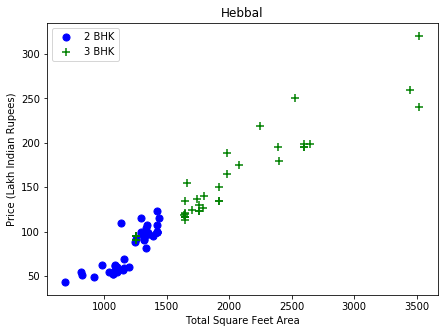

In [39]:
plot_scatter(df4,"Hebbal")

Text(0, 0.5, 'Count')

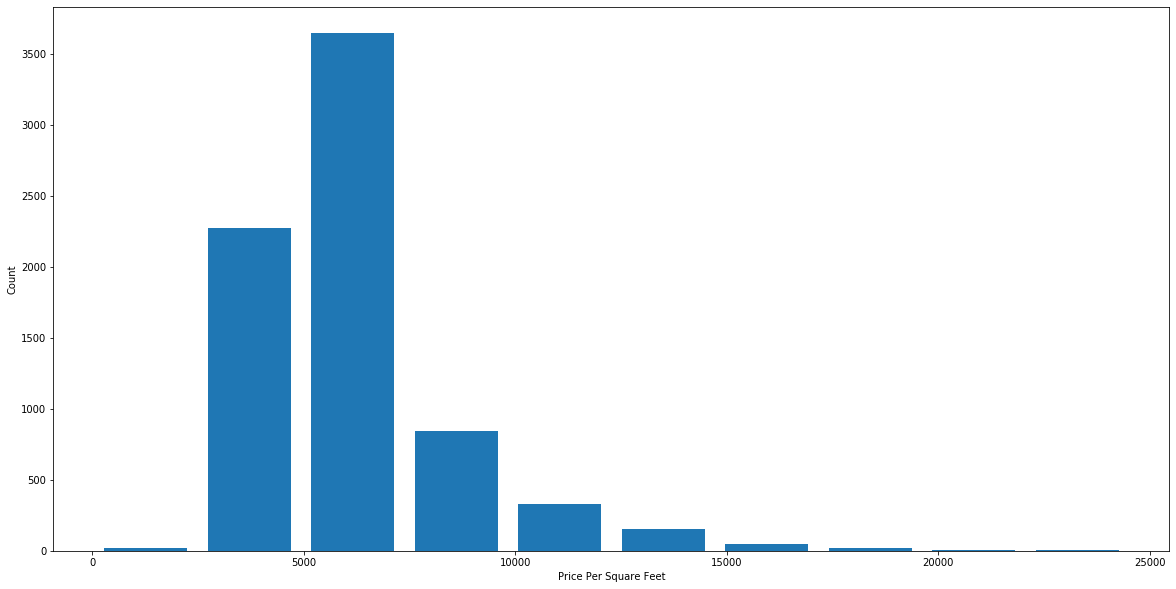

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df4[df4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5291,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8507,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8596,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9332,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9664,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


#### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [43]:
df4[df4.bath>df4.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1632,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5252,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6727,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8431,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


#### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [44]:
df5 = df4[df4.bath<df4.bhk+2]
df5.shape

(7266, 7)

In [45]:
df6 = df5.drop(['size','price_per_sqft'],axis='columns')
df6.head(2)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


### Do One Hot encoding for location

In [46]:
dummies= pd.get_dummies(df6.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df7 = pd.concat([df6, dummies.drop('other', axis='columns')], axis='columns')
df7.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df7.drop('location', axis=1, inplace=True)
df7.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df7.shape

(7266, 245)

### Model Building

In [50]:
X= df7.drop('price', axis=1)
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y = df7.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [53]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

-197.0404173007335

#### Using K Fold CV to measure accuracy

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #gerates random split of samples for k folds

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.63989067, 0.62381148, 0.62305156, 0.60649799, 0.66420308])

##### We got highest accuracy of 66% among 5 different 5 folds/iterations. So we willcheck with other Regression methods too. For this purpose we use GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

dict_algos = {
    'linear_regression':{
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso':{
        'model': Lasso(),
        'params':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree':{
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
        }
    }
}

scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for algo_name, config in dict_algos.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
    
pd.DataFrame(scores,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,linear_regression,0.631491,{'normalize': True}
1,lasso,0.418357,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.738061,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


#### Based  on results above Decision Tree gives best score

### Test the model

In [56]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return dt_reg.predict([x])[0]

In [57]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

93.0

In [58]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

80.0

In [59]:
predict_price('Indira Nagar',1000, 3, 3)

80.0

### Export model to pickle file

In [60]:
import pickle

with open('bangalore_house_prediction_model.pickle', 'wb') as f:
    pickle.dump(dt_reg, f)

### Export location and column information to a file that will be useful later on in our prediction application

In [61]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))